### the goal is to cluster the customers based on fainantial behavior to put the swietable Marketing plan for them

goal is to group customers into clusters that share similar financial and behavioral 
characteristics, using unsupervised learning techniques. 

```
Input variables:
# bank client data:
1 - age (numeric).
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services").
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed).
4 - education (categorical: "unknown","secondary","primary","tertiary").
5 - default: has credit in default? (binary: "yes","no").
6 - balance: average yearly balance, in euros (numeric) .
7 - housing: has housing loan? (binary: "yes","no").
8 - loan: has personal loan? (binary: "yes","no").
# related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular").
10 - day: last contact day of the month (numeric).
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec").
12 - duration: last contact duration, in seconds (numeric).
# other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact).
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted).
15 - previous: number of contacts performed before this campaign and for this client (numeric).
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success").

```

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('bank-full.csv')

In [4]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
23613,48,technician,married,secondary,no,1548,no,no,cellular,28,aug,143,5,-1,0,unknown,no
33289,37,entrepreneur,married,primary,no,1529,yes,no,cellular,20,apr,201,3,-1,0,unknown,no
42648,40,management,married,tertiary,no,5142,no,no,cellular,13,jan,147,2,224,1,failure,no
7487,27,admin.,single,secondary,no,-181,yes,yes,unknown,29,may,81,4,-1,0,unknown,no
36814,59,services,married,primary,no,64,yes,yes,telephone,12,may,370,2,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.shape

(45211, 17)

In [7]:
df.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
print(f"{len(df['job'].unique())} unique job titles in the dataset.", df['job'].unique())
print(f'{len(df["education"].unique())} unique education levels in the dataset.', df['education'].unique())
print(f'{len(df["marital"].unique())} unique marital statuses in the dataset.', df['marital'].unique())
print(f'{len(df["month"].unique())} unique months in the dataset.', df['month'].unique())
print(f'{len(df["poutcome"].unique())} unique poutcomes in the dataset.', df['poutcome'].unique())
print(f'{(df["age"] < 0).sum()} negative ages in the dataset.')
print(f'{(df["balance"] < 0).sum()} negative balances in the dataset.')

12 unique job titles in the dataset. ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
4 unique education levels in the dataset. ['tertiary' 'secondary' 'unknown' 'primary']
3 unique marital statuses in the dataset. ['married' 'single' 'divorced']
12 unique months in the dataset. ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
4 unique poutcomes in the dataset. ['unknown' 'failure' 'other' 'success']
0 negative ages in the dataset.
3766 negative balances in the dataset.


In [10]:
def plot_df_balance(df):
    for col in df.columns:
        plt.figure(figsize=(8, 4))
        
        # Check if column is numeric
        if pd.api.types.is_numeric_dtype(df[col]):
            sns.boxplot(x=df[col], color='skyblue')
            plt.title(f'Boxplot of Numeric Column: {col}')
            
        # Check if column is categorical (object, category, or bool)
        else:
            sns.countplot(x=df[col], palette='viridis', hue=df[col], legend=False)
            plt.title(f'Count Plot of Categorical Column: {col}')
            plt.xticks(rotation=45)
            
        plt.tight_layout()
        plt.show()

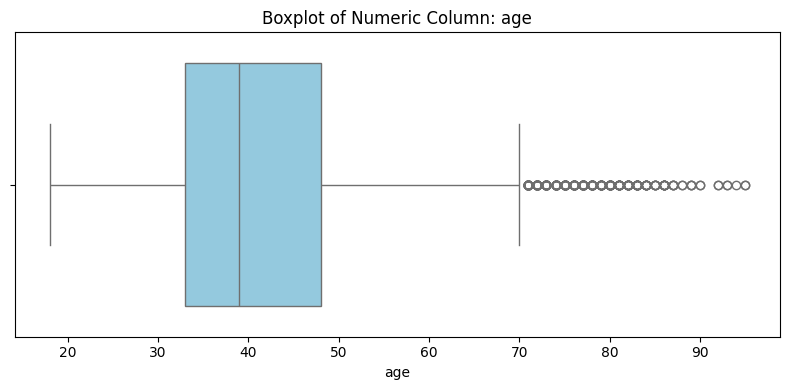

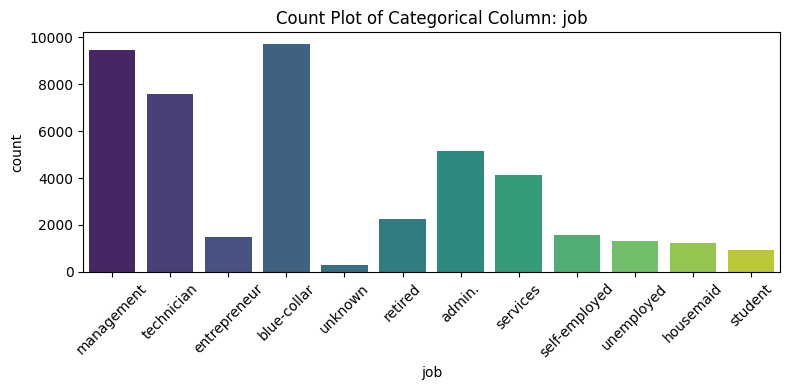

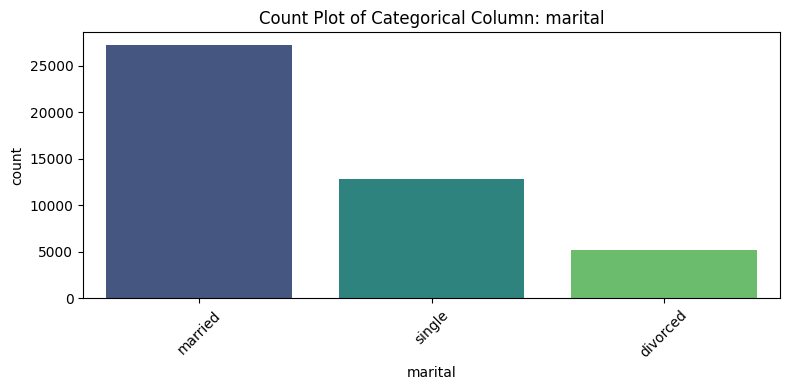

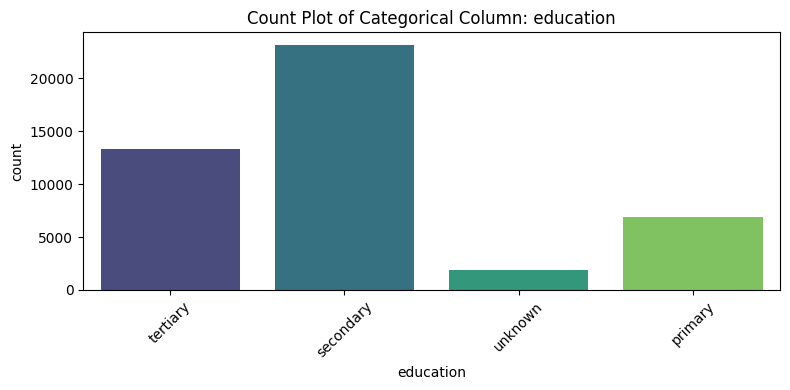

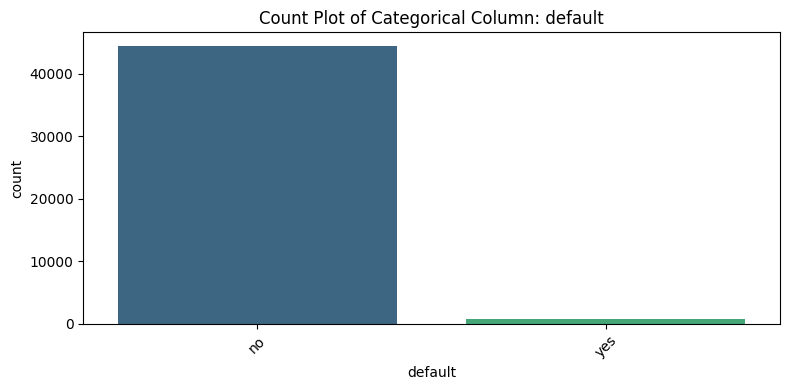

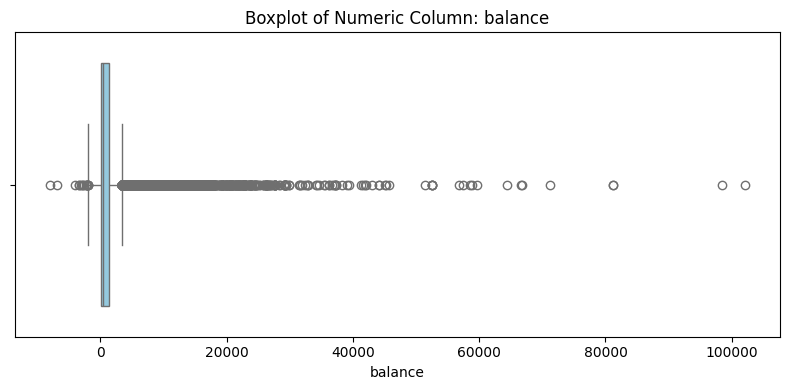

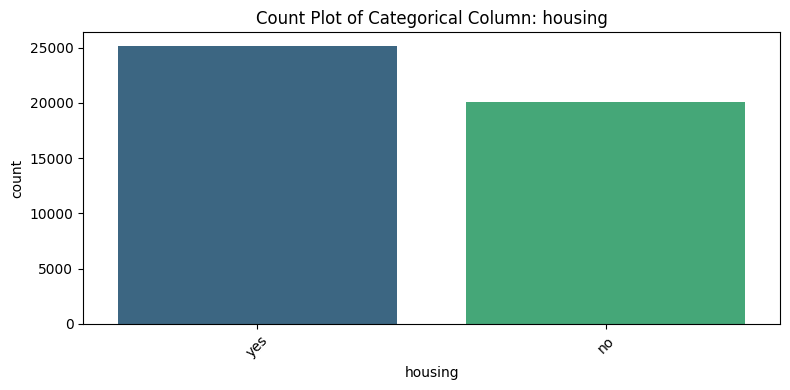

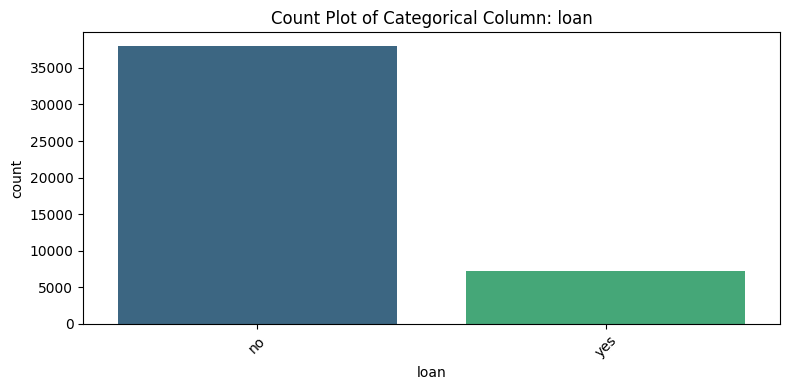

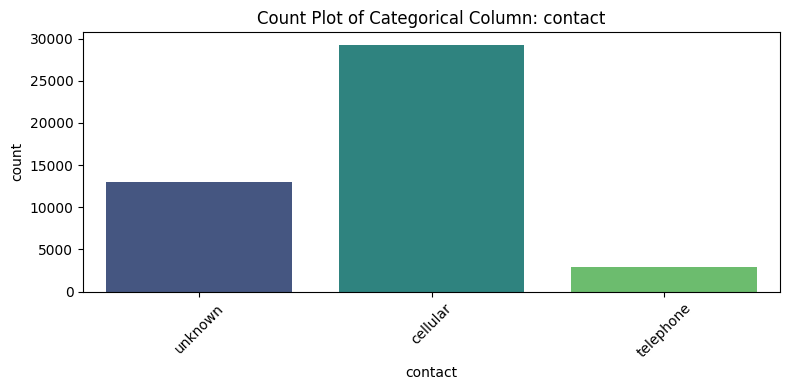

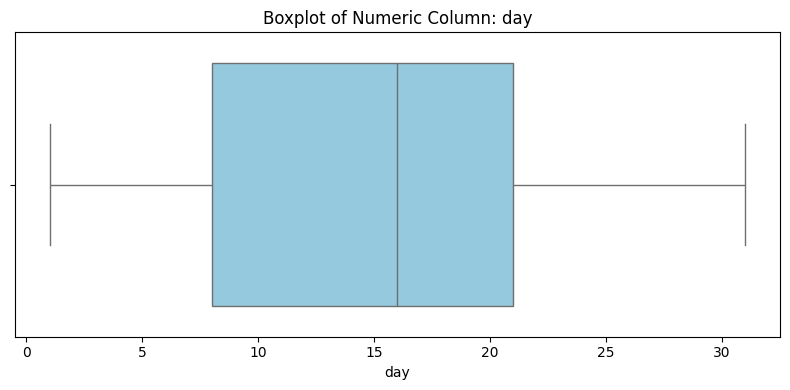

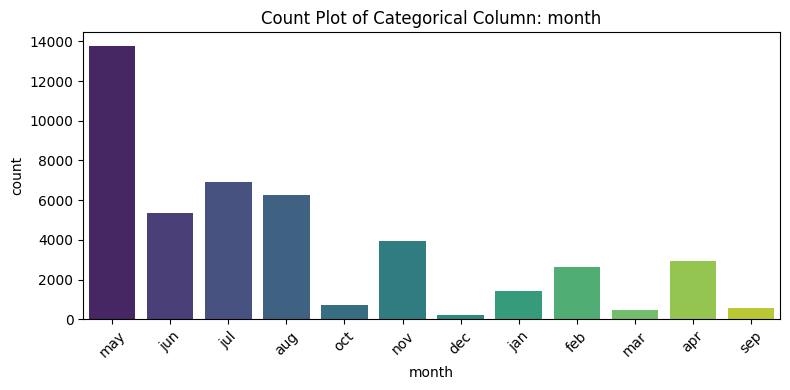

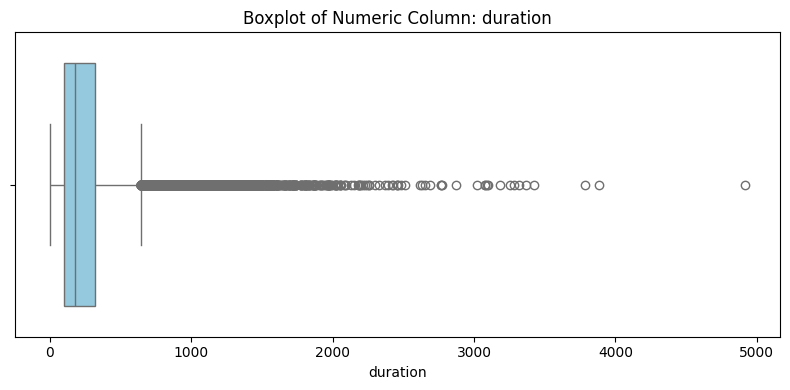

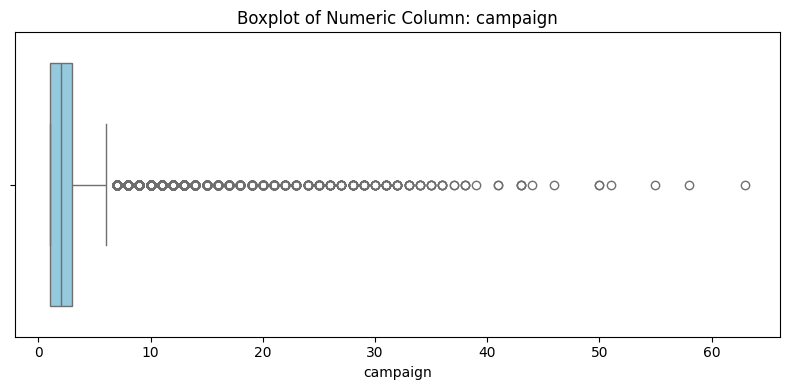

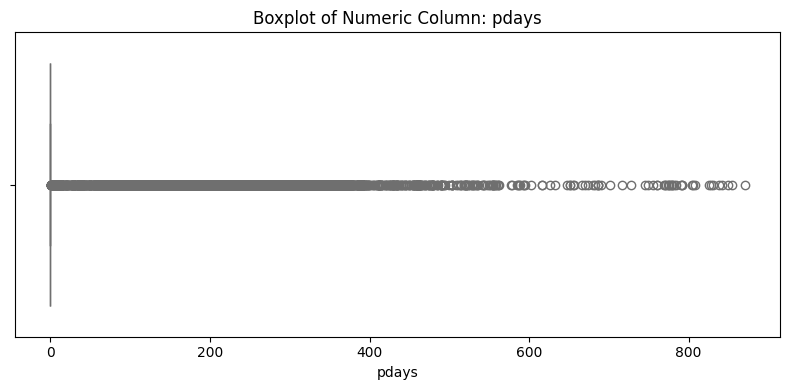

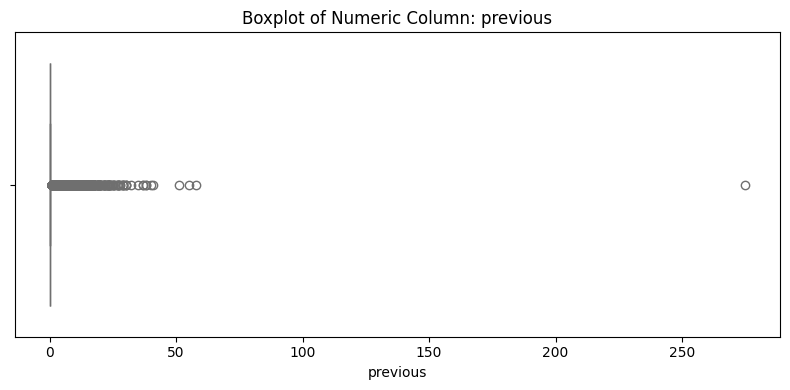

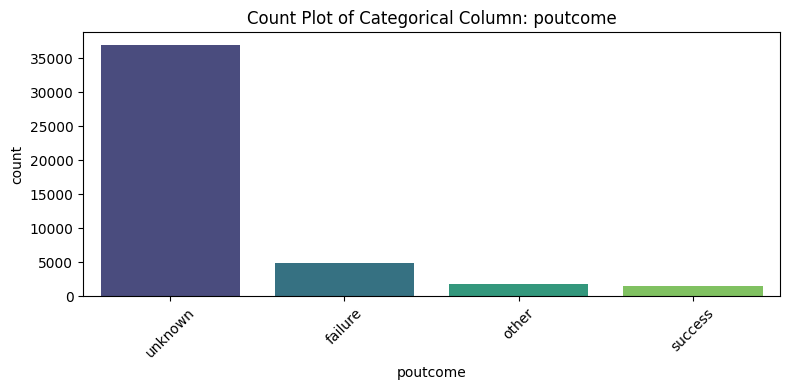

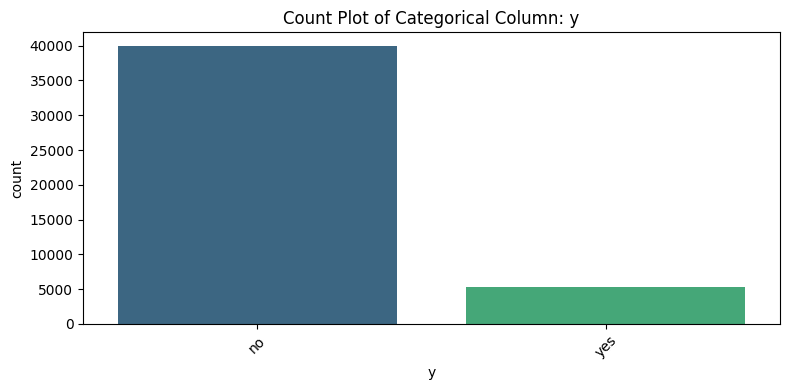

In [11]:
plot_df_balance(df)

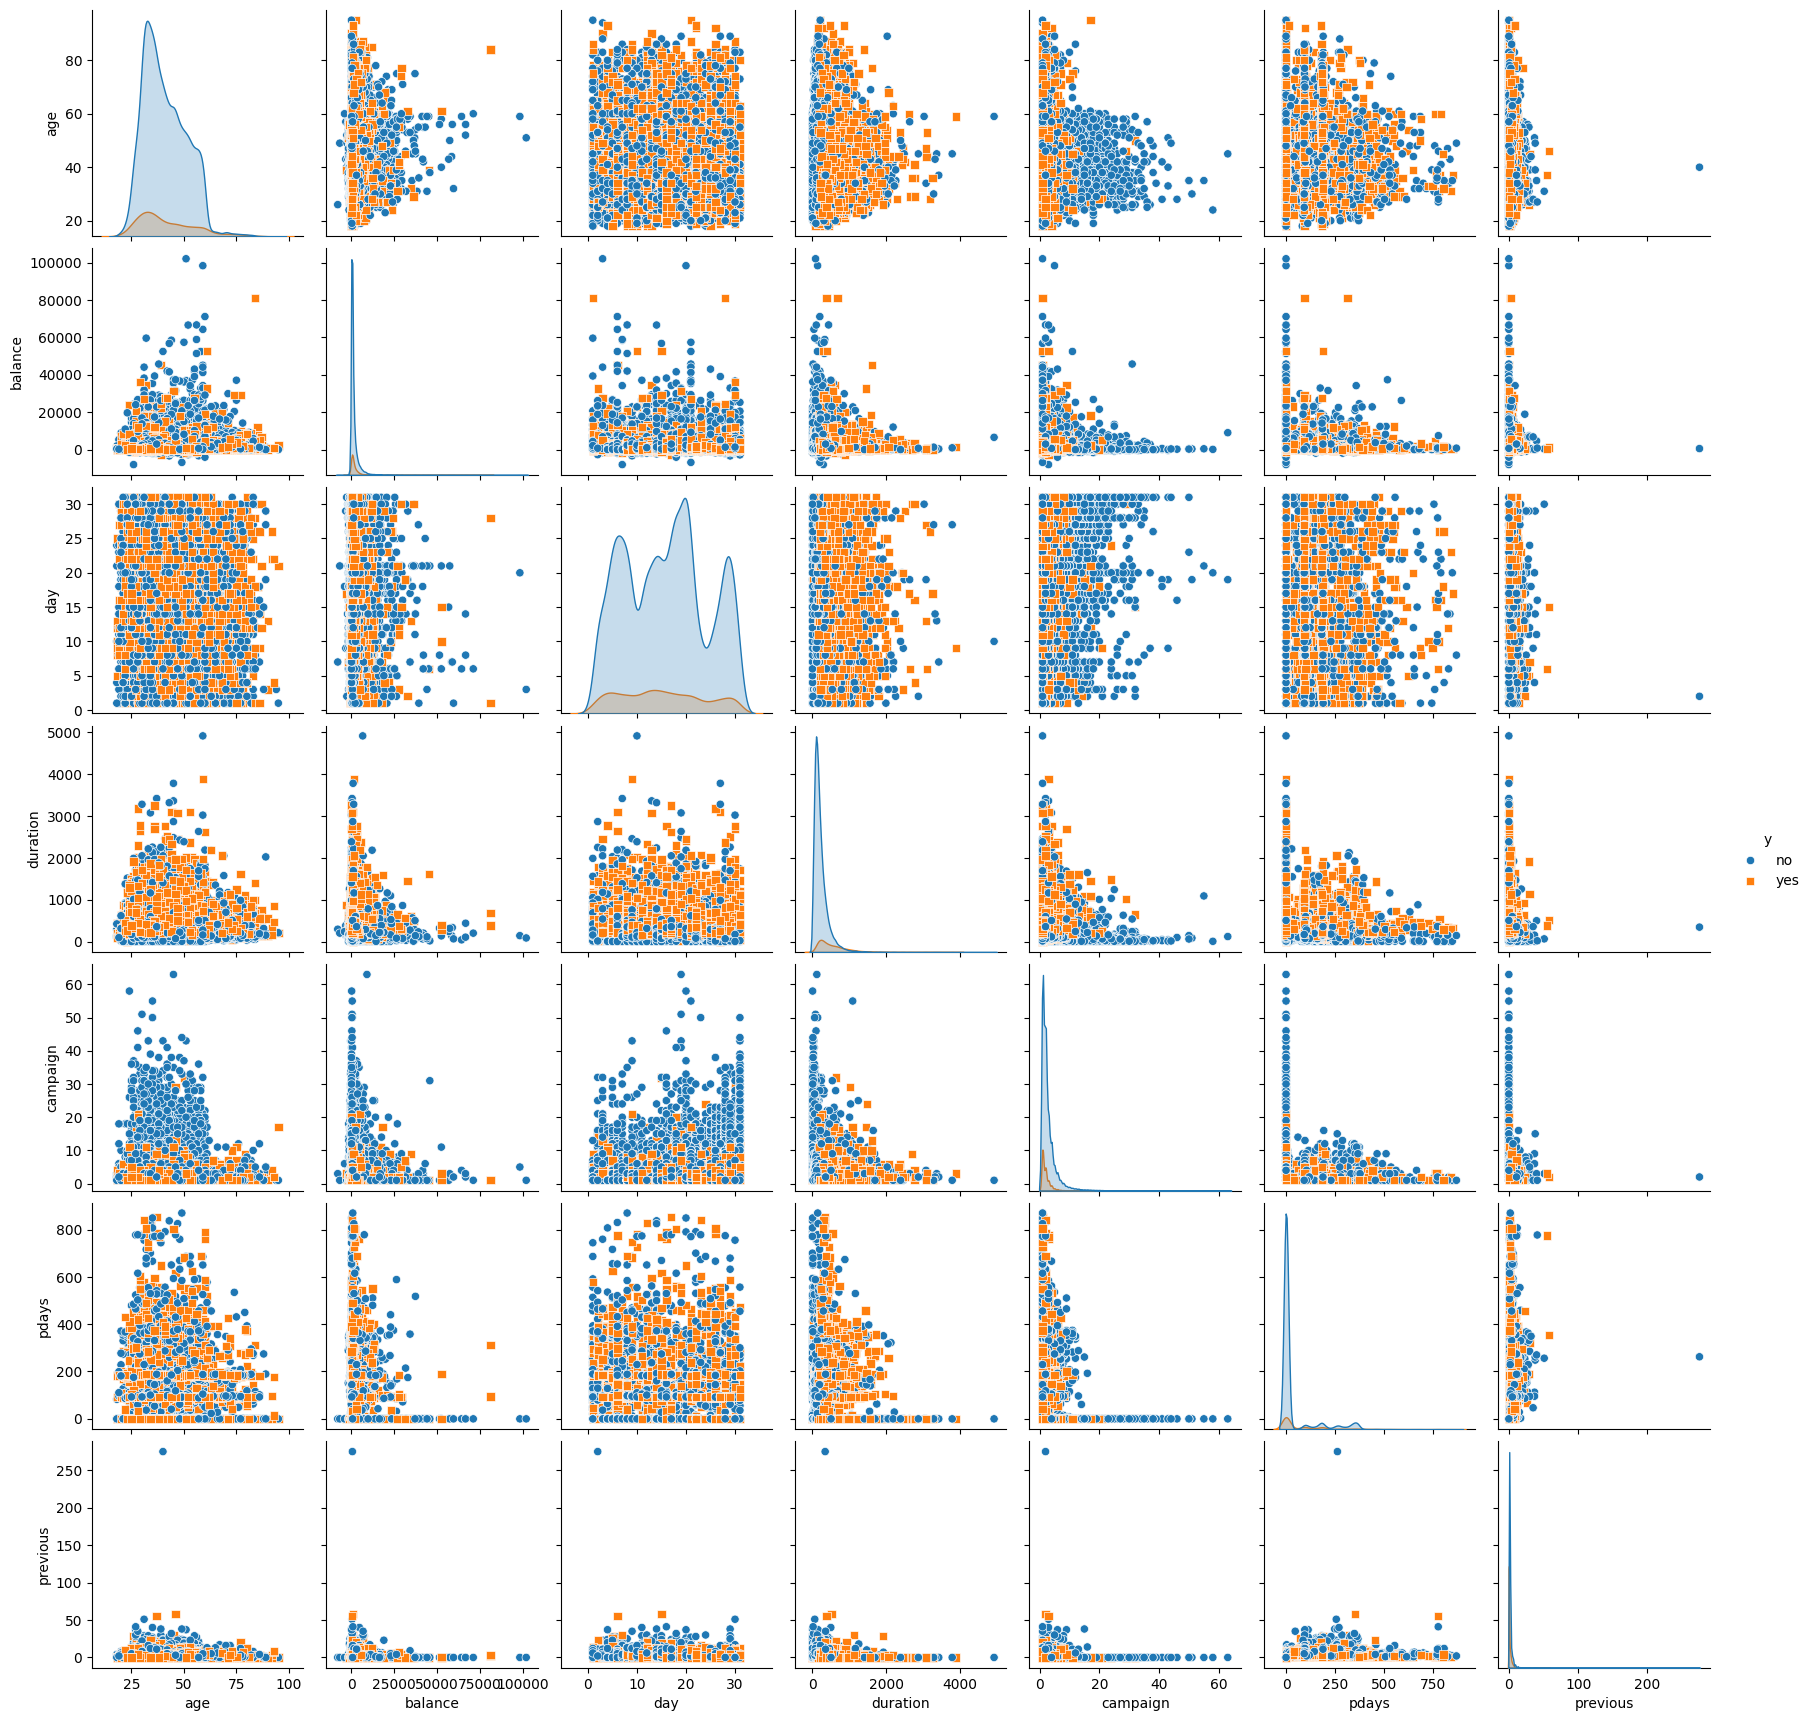

In [12]:
sns.pairplot(df, hue='y', markers=["o", "s"])
plt.show()

## selecting the relevant columns

In [13]:
df = df.drop(columns=[
    'education',   # Education level
    'default',     # Credit default
    'housing',     # Housing loan
    'loan',        # Personal loan
    'contact',     # Contact communication type
    'day',         # Day of month
    'month',       # Month
    'previous',    # Previous number of contacts
    'poutcome',    # Previous campaign outcome
    'y'            # Target variable (output)
])

In [14]:
df.shape

(45211, 7)

In [15]:
print(f'{(df["balance"] < 0).sum()} negative balances in the dataset.')

3766 negative balances in the dataset.


In [16]:
df = df[df['balance'] >= 0].reset_index(drop=True)

In [17]:
df.shape

(41445, 7)

In [18]:
df.sample(5)

,age,job,marital,balance,duration,campaign,pdays
26802,48,management,single,460,91,3,264
34478,53,services,divorced,765,959,3,174
2761,45,blue-collar,married,532,137,2,-1
10906,40,blue-collar,divorced,0,91,2,-1
15805,44,blue-collar,married,0,83,2,-1


## categorical columns encoding

user the one-hot-encoding seince that is the best for the k-means model

In [19]:
categorical_cols = list(df.select_dtypes(include=['object']).columns)

In [20]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [21]:
df.sample(5)

,age,balance,duration,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single
29055,32,180,179,1,334,True,False,False,False,False,False,False,False,False,False,False,True,False
16924,51,1178,530,2,-1,False,False,False,False,False,True,False,False,False,False,False,True,False
15040,49,1147,96,3,-1,False,True,False,False,False,False,False,False,False,False,False,True,False
40599,27,842,273,1,91,False,False,False,False,False,False,False,False,True,False,False,False,True
13234,30,1286,544,1,-1,False,False,False,False,False,False,True,False,False,False,False,True,False


columns names after encoding:

In [22]:
df.columns.tolist()

['age',
 'balance',
 'duration',
 'campaign',
 'pdays',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single']

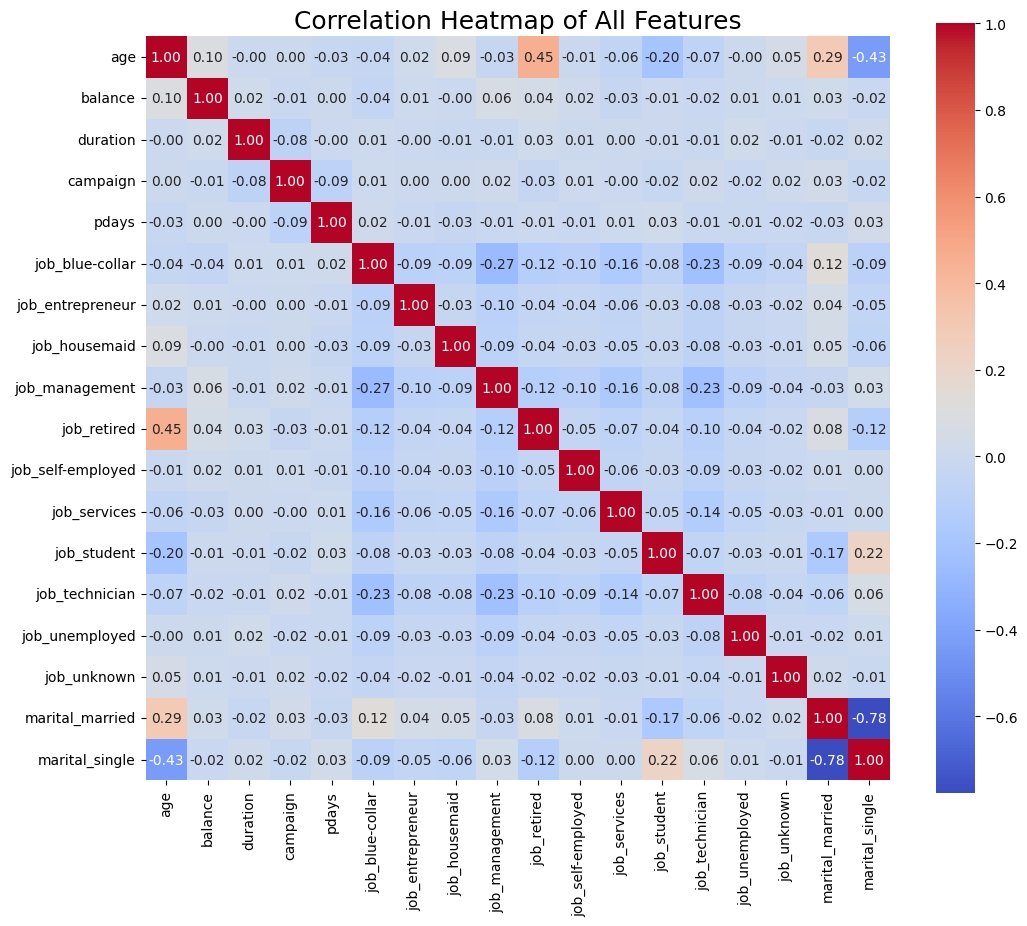

In [23]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of All Features", fontsize=18)
plt.show()

## data scaling

we will use the standard scalling couse that is the best for the k-means model

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [26]:
X

array([[ 1.57667455,  0.20042024,  0.00885333, ..., -0.08306464,
         0.81055823, -0.63098165],
       [ 0.27298354, -0.47416195, -0.41722403, ..., -0.08306464,
        -1.23371766,  1.58483215],
       [-0.7513451 , -0.48277771, -0.70773132, ..., -0.08306464,
         0.81055823, -0.63098165],
       ...,
       [ 2.88036555,  1.34025352,  3.36324418, ..., -0.08306464,
         0.81055823, -0.63098165],
       [ 1.48355376, -0.2702556 ,  0.96559067, ..., -0.08306464,
         0.81055823, -0.63098165],
       [-0.37886196,  0.46463691,  0.39619638, ..., -0.08306464,
         0.81055823, -0.63098165]])

## Dimensionality Reduction

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

In [29]:
X_pca

array([[-1.40502955, -1.27189216],
       [ 1.73181514, -0.58122225],
       [-0.68972453,  0.69095682],
       ...,
       [-3.33345974, -3.12090235],
       [-1.69870245,  1.3686006 ],
       [-0.83827988,  0.32292318]])

# Model selection

In [30]:
from sklearn.cluster import KMeans

### Elbow Method

In [31]:
inertia = []
K = range(1, 11)

In [32]:
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

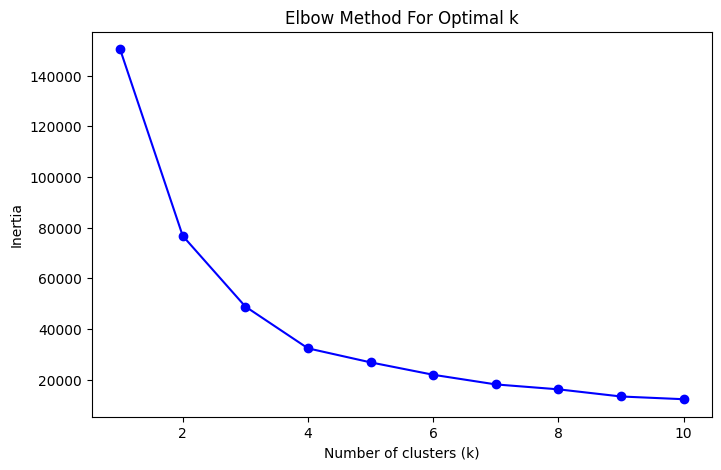

In [33]:
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

 5-Clusters is pretty good

### silhouette score

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(
        X_pca,
        labels,
        sample_size=5000,   # try 2000–5000
        random_state=42
    )
    scores.append(score)

In [36]:
scores

[0.4914105473023128,
 0.42789608236510485,
 0.5017788525616234,
 0.4884321669547014,
 0.44332446402980985,
 0.4618998754688263,
 0.4232703347710396,
 0.45353003085812127,
 0.4358426009653376]

yes, 5 is prrety good

# WE WILL TRY KMEANS

In [37]:
kmeans = KMeans(n_clusters=5, random_state=42)

In [38]:
clusters = kmeans.fit_predict(X_pca)
df['Cluster'] = clusters

In [39]:
df.sample(5)

,age,balance,duration,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,Cluster
41113,28,6551,203,1,-1,False,False,False,True,False,False,False,False,False,False,False,False,True,1
18338,45,2476,239,2,-1,False,True,False,False,False,False,False,False,False,False,False,True,False,2
24376,36,2452,161,1,-1,True,False,False,False,False,False,False,False,False,False,False,True,False,0
305,48,1,669,3,-1,True,False,False,False,False,False,False,False,False,False,False,True,False,0
17290,52,1515,20,4,-1,True,False,False,False,False,False,False,False,False,False,False,True,False,0


In [40]:
cluster_profile = df.groupby('Cluster').mean()
cluster_profile

,age,balance,duration,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single
Cluster,,,,,,,,,,,,,,,,,,
0,41.272320,1066.456059,247.916737,3.228100,42.086482,0.926113,0.006717,0.000700,0.000000,0.000000,0.001399,0.055276,0.000000,0.005598,0.000280,0.000000,0.939547,0.000000
1,33.438207,1442.481948,266.484130,2.548006,45.250149,0.001091,0.020928,0.011704,0.294485,0.001289,0.042650,0.101865,0.086888,0.240329,0.038187,0.006249,0.000198,0.980262
2,43.346024,1421.691260,251.950042,2.705984,36.302377,0.004575,0.056952,0.054480,0.295278,0.000631,0.053586,0.106437,0.000000,0.220183,0.043069,0.010307,0.849706,0.002156
3,61.317547,4284.776009,293.645963,2.345109,36.722050,0.001165,0.008929,0.015916,0.119565,0.821429,0.007376,0.001941,0.000000,0.004658,0.002717,0.009705,0.800466,0.032609
4,33.449905,971.273905,272.988952,2.925333,54.288381,0.724952,0.003429,0.000381,0.000381,0.000000,0.004952,0.081143,0.019048,0.106286,0.006095,0.000000,0.028952,0.683429


In [41]:
import joblib

joblib.dump(scaler, "scaler.pkl")
joblib.dump(pca, "pca.pkl")
joblib.dump(kmeans, "kmeans.pkl")
joblib.dump(df.drop(columns=["Cluster"]).columns.tolist(), "columns.pkl")


['columns.pkl']

clusters visualization

In [42]:
data_visualization = df.copy()

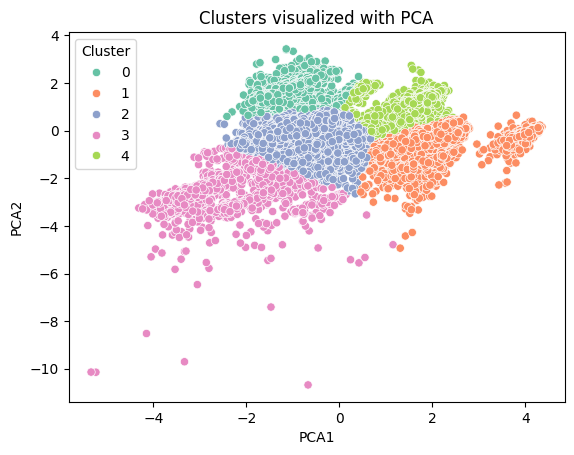

<Figure size 1000x600 with 0 Axes>

In [43]:
data_visualization['PCA1'] = X_pca[:,0]
data_visualization['PCA2'] = X_pca[:,1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data_visualization, palette='Set2')
plt.title('Clusters visualized with PCA')
plt.figure(figsize=(10, 6))
plt.show()

```
Cluster 0 → Stable Working-Class Married Customers
Cluster 1 → Young Single Professionals
Cluster 2 → High-Value Married Managers
Cluster 3 → Students & Early-Career Prospects
Cluster 4 → Affluent Retired Customers
```

# WE WILL TRY DBSCAN

In [44]:
from sklearn.cluster import DBSCAN

In [45]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_pca)

In [46]:
data_visualization['DBSCAN_Cluster'] = dbscan_clusters

print(f"Unique clusters found by DBSCAN: {np.unique(dbscan_clusters)}")

Unique clusters found by DBSCAN: [-1  0  1  2  3  4  5]


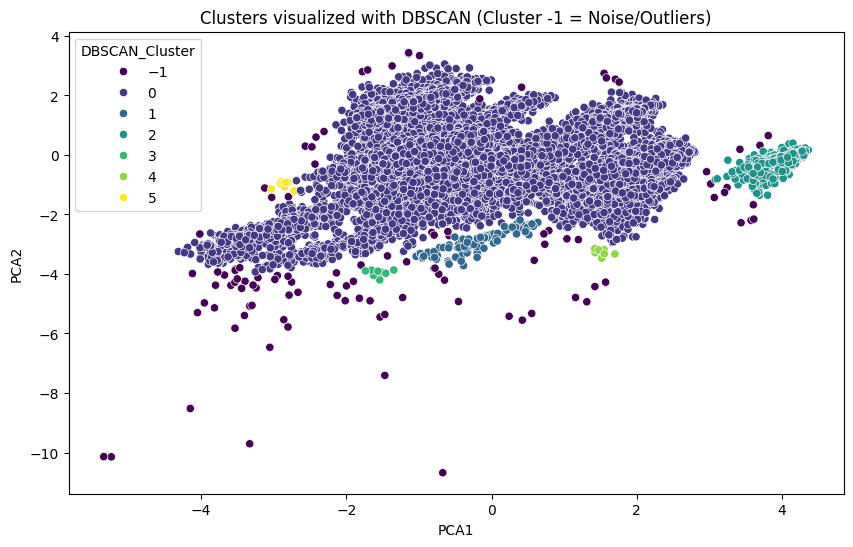

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=data_visualization, palette='viridis')
plt.title('Clusters visualized with DBSCAN (Cluster -1 = Noise/Outliers)')
plt.show()

In [48]:
# Check the distribution of DBSCAN clusters
dbscan_counts = data_visualization['DBSCAN_Cluster'].value_counts().sort_index()
print("Customer counts per DBSCAN cluster:")
print(dbscan_counts)

# Quick comparison: How many outliers did it find?
outliers_count = (dbscan_clusters == -1).sum()
print(f"\nTotal Outliers detected: {outliers_count} ({outliers_count/len(X_pca)*100:.2f}%)")

Customer counts per DBSCAN cluster:
DBSCAN_Cluster
-1      107
 0    40351
 1      107
 2      856
 3        9
 4        7
 5        8
Name: count, dtype: int64

Total Outliers detected: 107 (0.26%)


in DBscan, we cna't controle the number of clusters, and the clusters are taken based on the densty of the data, 
and our data have high densty, so we can't use it 

# till now we will use the k-means

# WE WILL TRY THE Hierarchical Clustering (Agglomerative)

In [49]:
import scipy.cluster.hierarchy as sch

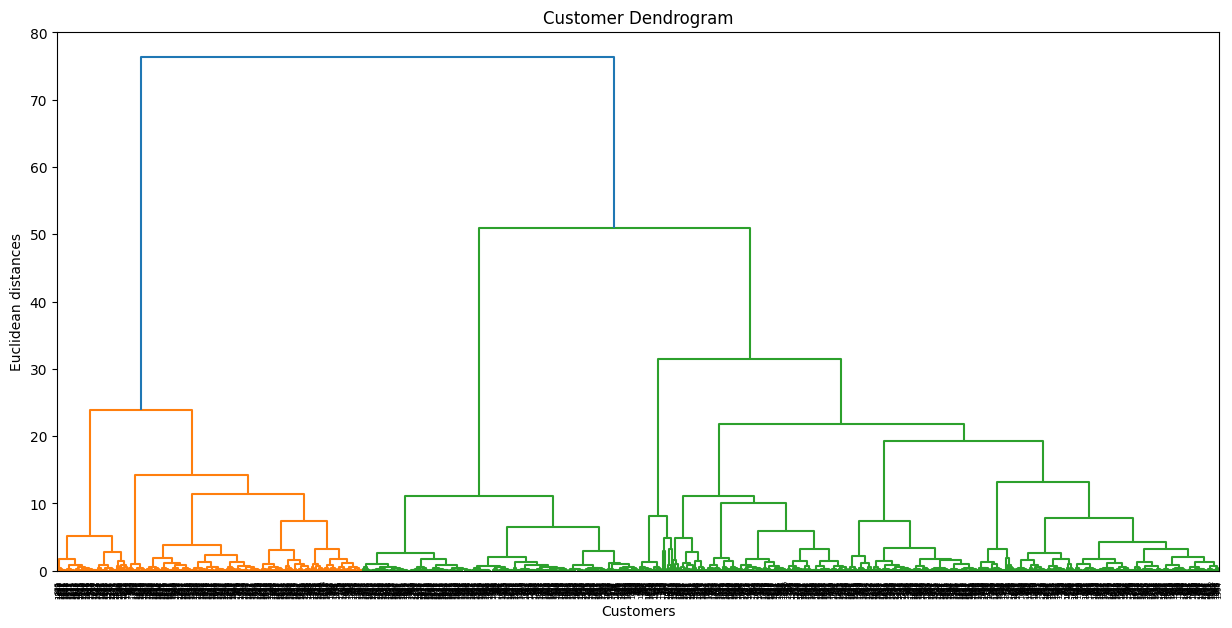

In [50]:
X_sample = X_pca[:2000] 

plt.figure(figsize=(15, 7))
plt.title("Customer Dendrogram")
# 'ward' linkage minimizes the variance of clusters being merged
dendrogram = sch.dendrogram(sch.linkage(X_sample, method='ward'))
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [52]:
from sklearn.cluster import AgglomerativeClustering

# We use the same number of clusters as your K-Means (5) for comparison
# Due to memory constraints for large datasets, use a sample
X_sample = X_pca[:2000]
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(X_sample)

# Add the results to your visualization dataframe for the sample
data_visualization_sample = data_visualization[:2000].copy()
data_visualization_sample['HC_Cluster'] = hc_clusters

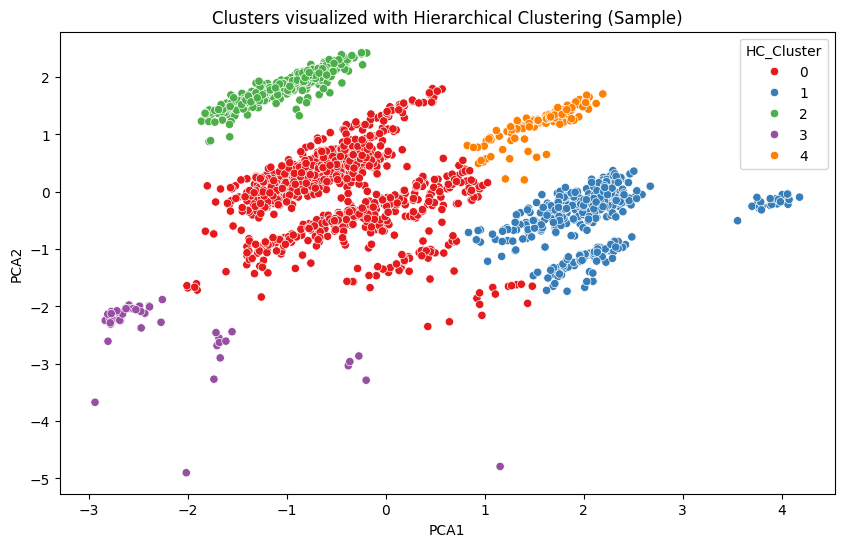

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='HC_Cluster', data=data_visualization_sample, palette='Set1')
plt.title('Clusters visualized with Hierarchical Clustering (Sample)')
plt.show()

the result of the Hierarchical Clustering (Agglomerative) is mutch better that the db-scan but sill the k-nn is the best 

In [54]:
# CALCULATING SILHOUETTE SCORES FOR ALL MODELS
from sklearn.metrics import silhouette_score

# 1. K-Means Silhouette Score
# Uses the 'kmeans' model and X_pca data from previous cells
kmeans_score = silhouette_score(X_pca, kmeans.labels_)
print(f"K-Means Silhouette Score: {kmeans_score:.4f}")

# 2. DBSCAN Silhouette Score
# Note: Silhouette score is not defined if only 1 cluster is found or for noise (-1).
# We filter out noise points to get a score for the actual clusters formed.
if 'DBSCAN_Cluster' in data_visualization.columns:
    db_labels = data_visualization['DBSCAN_Cluster']
    mask = db_labels != -1
    if len(np.unique(db_labels[mask])) > 1:
        dbscan_score = silhouette_score(X_pca[mask], db_labels[mask])
        print(f"DBSCAN Silhouette Score (excluding noise): {dbscan_score:.4f}")
    else:
        print("DBSCAN Silhouette Score: Not enough clusters formed to calculate.")

# 3. Hierarchical Clustering (Agglomerative) Silhouette Score
# Uses the 'hc_clusters' defined in the sample visualization step
if 'HC_Cluster' in data_visualization_sample.columns:
    hc_score = silhouette_score(X_sample, data_visualization_sample['HC_Cluster'])
    print(f"Hierarchical Silhouette Score (on sample): {hc_score:.4f}")

K-Means Silhouette Score: 0.4876
DBSCAN Silhouette Score (excluding noise): 0.0777
Hierarchical Silhouette Score (on sample): 0.5044


Hierarchical Silhouette Score i higher that the k-means one but it's not the only object to mesure on 